---

# Numerical Analysis
# Least Squares Approximation

## Remember

Given the dataset $(x, f)$ where $x = \{x_0, x_1, \dots, x_n\}^T$ and $f = \{f_0, f_1, \dots, f_n\}^T$, we can quickly find the best polynomial fit for any specified polynomial degree!

Let $x^{(j)}$ be the vector ${x_0^{(j)}, x_1^{(j)}, \dots, x_n^{(j)}}$, to compute the best fitting polynomial of degree 3 (for example) $p_3 (x) = a_0 + a_1x + a_2 x^2 + a_3 x^3$, we define:

$$
A = 
\begin{bmatrix}
    \textbf{1} & \textbf{x} & \textbf{x}^2 & \textbf{x}^3
\end{bmatrix}
$$

where each element is a column vector.

Then, to solve $Aa = f$, we left-multiply both sides by $A^T$ and we compute $a = (A^TA)^{-1}(A^Tf)$.

It is required to construct best ﬁt by polynomials of degree n-1 (i.e. having n coefficients) for n = 1, 2, 3, 4, 5 of the function $cos(2\pi x)$ at 21 equidistant points on the interval $[0,1]$.

Least-Squares Approximation Algorithm

```
Input:
    x: vector of x values
    y: vector of y values
    n: the desired best fit polynomial degree
Output:
    a: vector of polynomial coefficients a

Algorithm:
    1. Construct polynomial matrix A such that
        A = [[1, x_0, x_0**2, ..., x_0**n],
             [1, x_1, x_1**2, ..., x_1**n].
             .
             .
             .,
             [1, x_m, x_m**2, ..., x_m**n]]
     2. Calculate the vector 'a' using the given formula.

```

#### TO-DO (1)

Deﬁne a function `make_poly_matrix` that takes in vector `x` of length of $m$, and the polynomial degree `n` and returns the matrix $A$ with shape $m\times n$.

In [ ]:
import numpy as np

# 1. create an empty matrix A with shape m by n.
# 2. Loop over the columns of matrix A and make each 
#    column equals x**i, where `i` is the index of the
#    column starting from 1 to n+1.
# 3. return A
def make_poly_matrix(x, n):
    # YOUR CODE HERE
    A = np.zeros([len(x),n])
    for i in range(len(x)):
      for j in range(n):
        A[i][j] = x[i]**j
    return A
    raise NotImplementedError()

In [ ]:
assert np.all(np.equal(make_poly_matrix(np.array([1,2,3]), 4),
                                       np.array([[ 1.,  1.,  1.,  1.],
                                                 [ 1.,  2.,  4.,  8.],
                                                 [ 1.,  3.,  9., 27.]])))

#### TO-DO (2)

Defien a function `LeastSqFit(x, y, n)` that takes in vector `x` and vector `y` and the polynomial degree `n` and return the polynomial coefficients `a`.

In [ ]:
from numpy.linalg import pinv, inv

def leastSqFit(x, y, n):
    # YOUR CODE HERE
    A = make_poly_matrix(x, n)
    A_T = A.transpose()
    a = np.dot((inv(np.dot(A_T,A))),(np.dot(A_T,y)))
    return a
    raise NotImplementedError()

In [ ]:
assert(np.all(np.isclose(make_poly_matrix(np.linspace(0, 1, 21), 5)@leastSqFit(
            np.linspace(0, 1, 21),
            np.cos(np.pi * 2 * np.linspace(0, 1, 21)), 5),
            np.array([0.97241529,  0.98036196,  0.83726923,  0.59320472,  0.29234577, -0.02702061, 
                    -0.3324977,  -0.59757911, -0.80164875, -0.92998084, -0.97373993, -0.92998084,
                    -0.80164875, -0.59757911, -0.3324977,  -0.02702061,  0.29234577,  0.59320472,
                    0.83726923,  0.98036196,  0.97241529]))))

#### TO-DO (3)

Define a function `plotApprox` that does not take any parameters, but should create 21 x values between 0 and 1, calculate $y = cos(2\pi x)$ and plot these points. Then, iterate over n = 1 to 5, calculating the best fit polynomial of degree n and plotting that polynomial given the same 21 points.

![download.png](attachment:download.png)

In [ ]:
import matplotlib.pyplot as plt
def col():
  return tuple(np.random.random() for i in range(3))
def plotApprox():
    # YOUR CODE HERE
    x = np.linspace(0,1,21)
    y = np.cos(2*np.pi*x)
    plt.figure(figsize=(6.4*3,4.8*3),facecolor=[0.91,0.91,0.91])
    plt.plot(x,y,color="blue")
    for  n in range(1,6):
      a = leastSqFit(x, y, n)
      A = make_poly_matrix(x, n)
      y_approx = np.dot(A,a)
      plt.plot(x,y_approx, color= col())
      print(a)
    return plt.show()
    raise NotImplementedError()

[0.04761905]
[ 4.76190476e-02 -5.55111512e-17]
[ 1.38010893 -8.41572555  8.41572555]
[ 1.38010893e+00 -8.41572555e+00  8.41572555e+00 -3.97903932e-13]
[  0.97241529   2.03256349 -41.30130085  78.53747471 -39.26873735]


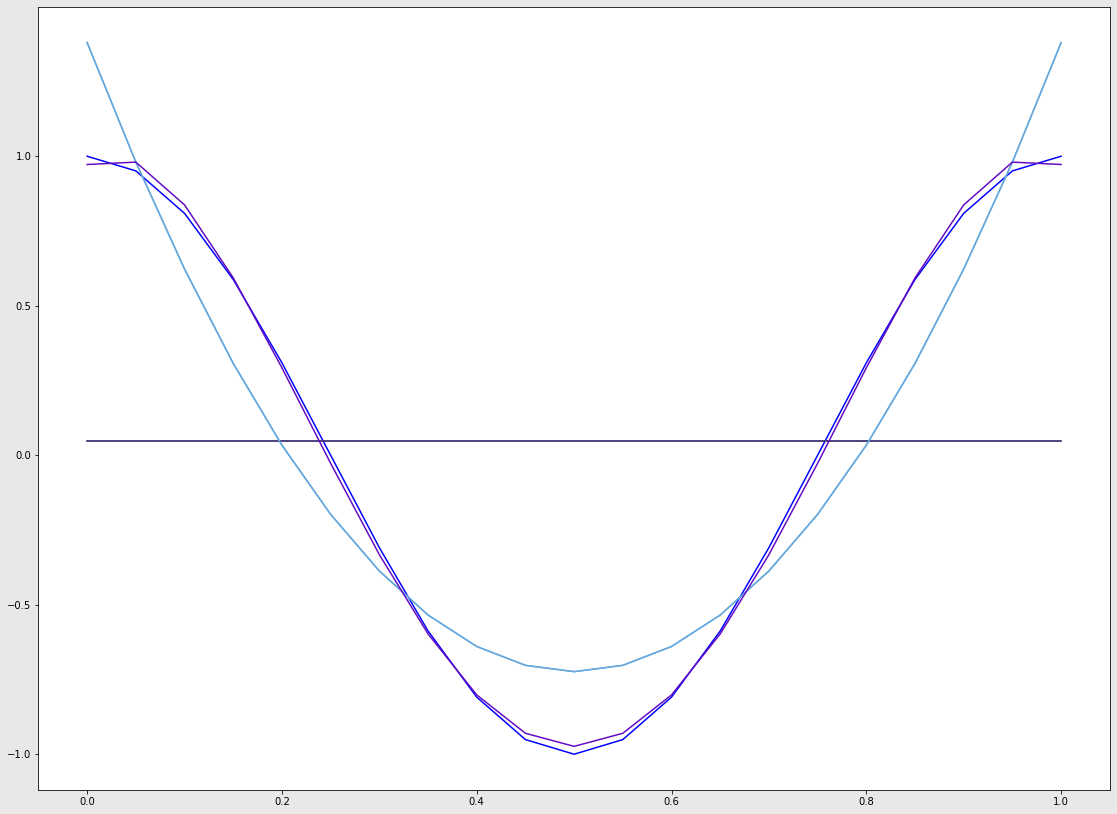

In [ ]:
plotApprox()

**\[THE END\]**